<a href="https://colab.research.google.com/github/yangpimpollo/etas_model/blob/main/FinalTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
install.packages('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [3]:
# Generar datos de ejemplo
set.seed(123)
n <- 100
X1 <- rnorm(n, mean = 5, sd = 2)
X2 <- rnorm(n, mean = 10, sd = 3)
Y <- 3 + 2*X1 + 1.5*X2 + rnorm(n, mean = 0, sd = 2)

datos <- data.frame(X1, X2, Y)
modelo <- lm(Y ~ X1 + X2, data = datos)
summary(modelo)



Call:
lm(formula = Y ~ X1 + X2, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7460 -1.3215 -0.2489  1.2427  4.1597 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7772     0.8796   4.294 4.16e-05 ***
X1            1.8668     0.1049  17.801  < 2e-16 ***
X2            1.5159     0.0660  22.969  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.903 on 97 degrees of freedom
Multiple R-squared:  0.8926,	Adjusted R-squared:  0.8904 
F-statistic:   403 on 2 and 97 DF,  p-value: < 2.2e-16


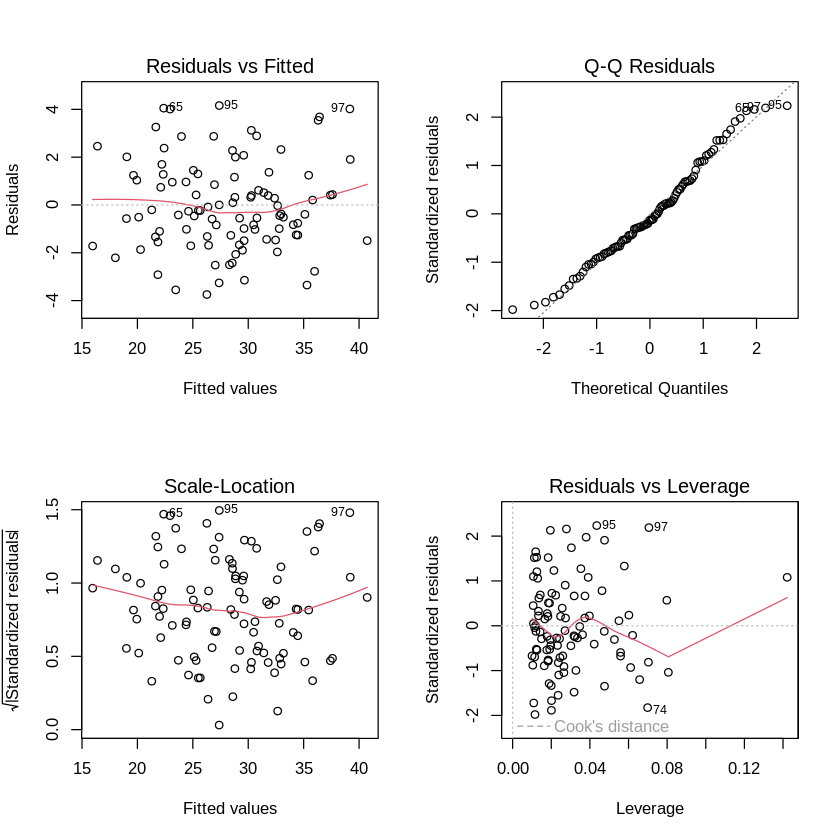

In [4]:
par(mfrow = c(2, 2))

  plot(modelo, which = 1)   # 1. Residuos vs Ajustados para evaluar la linealidad y homoscedasticidad
  plot(modelo, which = 2)   # 2. Gráfico QQ para evaluar la normalidad de los residuos
  plot(modelo, which = 3)   # 3. Escala-ubicación (Spread-Location) para evaluar la homoscedasticidad
  plot(modelo, which = 5)   # 4. Residuos vs Leverage para identificar valores atípicos y puntos de alta influencia

par(mfrow = c(1, 1))


In [10]:
library(lmtest)
#print("----------------------------------normalidad de res--  p-valor>0.05 normal")
  shapiro.test(residuals(modelo))
#print("----------------------------------Goldfeld-Quandt Test-- p-valor>0.05 homocedasatico-")
  gqtest(modelo)
#print("----------------------------------Breusch-Pagan Test---")
  bptest(modelo)
#print("----------------------------------durvin Watson independencia de res---")
  dwtest(modelo)


	Shapiro-Wilk normality test

data:  residuals(modelo)
W = 0.97815, p-value = 0.09534



	Goldfeld-Quandt test

data:  modelo
GQ = 1.0352, df1 = 47, df2 = 47, p-value = 0.4531
alternative hypothesis: variance increases from segment 1 to 2



	studentized Breusch-Pagan test

data:  modelo
BP = 0.039949, df = 2, p-value = 0.9802



	Durbin-Watson test

data:  modelo
DW = 1.8296, p-value = 0.1989
alternative hypothesis: true autocorrelation is greater than 0


In [ ]:
install.packages("car")
library(car)

In [ ]:
# Calcular el VIF para el modelo
vif(modelo)

VIF cercano a 1: No hay multicolinealidad.
VIF entre 1 y 5: Moderada multicolinealidad.
VIF mayor que 5 o 10: Alta multicolinealidad.

In [ ]:
# Matriz de correlación entre las variables predictoras
cor(datos[, c("X1", "X2")])